In [185]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F

class TwoPathConv(nn.Module):
    def __init__(self):
        super(TwoPathConv, self).__init__()
        self.upper_layer1 = nn.Sequential(
            nn.Conv2d(4,64,7),
            nn.ReLU(),
            nn.MaxPool2d((4,4),stride = 1)
        )
        self.upper_layer2 = nn.Sequential(
            nn.Conv2d(64,64,3),
            nn.ReLU(),
            nn.MaxPool2d((2,2),stride = 1)
        )
        self.under_layer1 = nn.Sequential(
            nn.Conv2d(4,160,13),
            nn.ReLU()
        )
        self.final_layer = nn.Conv2d(224,5,21)
        #self.upper_conv1 = nn.Conv2d(4,64,7)
        #self.upper_conv2 = nn.Conv2d(64,64,3)
        #self.under_conv1 = nn.Conv2d(4,160,13)
        #self.final_conv = nn.Conv2d(224,5,21)
    
    def forward(self, x):
        upper_x = self.upper_layer2(self.upper_layer1(x))
        under_x = self.under_layer1(x)
        #upper_x = F.max_pool2d(F.relu(self.upper_conv1(x)), (4, 4),stride = 1)
        #upper_x = F.max_pool2d(F.relu(self.upper_conv2(upper_x)), (2, 2), stride = 1)
        #under_x = F.relu(self.under_conv1(x))
        final_x = torch.cat((under_x, upper_x), 1)
        out = F.softmax(self.final_layer(final_x))
        #out = out.view(-1,5)
        return out
        
net = TwoPathConv()
print(net)

x = Variable(torch.randn(1,4,33,33), requires_grad = True)
y_pred = net.forward(x)
#y_pred = y_pred.data.resize_(1,5)
#y_pred = Variable(y_pred,requires_grad = True)
#print(y_pred.size())
#print(y_pred.view)

TwoPathConv (
  (upper_layer1): Sequential (
    (0): Conv2d(4, 64, kernel_size=(7, 7), stride=(1, 1))
    (1): ReLU ()
    (2): MaxPool2d (size=(4, 4), stride=(1, 1), dilation=(1, 1))
  )
  (upper_layer2): Sequential (
    (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU ()
    (2): MaxPool2d (size=(2, 2), stride=(1, 1), dilation=(1, 1))
  )
  (under_layer1): Sequential (
    (0): Conv2d(4, 160, kernel_size=(13, 13), stride=(1, 1))
    (1): ReLU ()
  )
  (final_layer): Conv2d(224, 5, kernel_size=(21, 21), stride=(1, 1))
)


(160, 216, 176)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0]


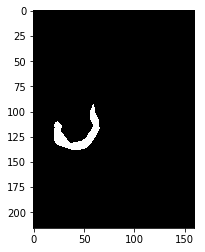

In [221]:
import SimpleITK as sitk
import matplotlib.pyplot as plt
input_image = sitk.ReadImage('VSD.Brain_3more.XX.XX.OT.6320.mha')
image_2D = sitk.Image(64, 64, sitk.sitkFloat32)
print(input_image.GetSize())
#help(image_2D)
array_image = sitk.GetArrayFromImage(input_image)
print(array_image[50,50,:])
variable_image = Variable(torch.from_numpy(array_image))
#print(variable_image)

plt.imshow(array_image[110,:,:], cmap = 'gray')

In [127]:

from graphviz import Digraph
import re
import torch
import torch.nn.functional as F
from torch.autograd import Variable
from torch.autograd import Variable
import torchvision.models as models


def make_dot(var):
    node_attr = dict(style='filled',
                     shape='box',
                     align='left',
                     fontsize='12',
                     ranksep='0.1',
                     height='0.2')
    dot = Digraph(node_attr=node_attr, graph_attr=dict(size="12,12"))
    seen = set()

    def add_nodes(var):
        if var not in seen:
            if isinstance(var, Variable):
                value = '('+(', ').join(['%d'% v for v in var.size()])+')'
                dot.node(str(id(var)), str(value), fillcolor='lightblue')
            else:
                dot.node(str(id(var)), str(type(var).__name__))
            seen.add(var)
            if hasattr(var, 'previous_functions'):
                for u in var.previous_functions:
                    dot.edge(str(id(u[0])), str(id(var)))
                    add_nodes(u[0])
    add_nodes(var.creator)
    return dot


inputs = torch.randn(1,3,224,224)
resnet18 = models.resnet18()
y = resnet18(Variable(inputs))
# print(y)
x = Variable(torch.randn(1,4,33,33), requires_grad = True)
y_pred = net.forward(x)

g = make_dot(y_pred)
g.view()
print(g)

ExecutableNotFound: failed to execute ['dot', '-Tpdf', '-O', 'Digraph.gv'], make sure the Graphviz executables are on your systems' PATH